# Chapter 4 - Training Models - Stansbury's Coding Examples



## Linear Regression - Closed-Form Solution

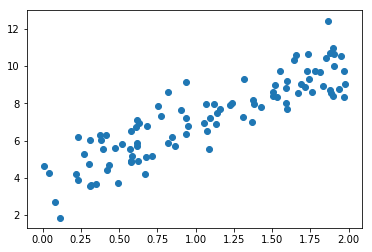

In [1]:
## Linear Regression Closed-Form Solution

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

plt.scatter(X,y)

In [2]:
# Prepare X, X_0 (first column) is always a column of value 1 concattenated to the front of X
X_b = np.c_[np.ones((100,1)), X]

# Solve normal equation for theta
theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

print(theta_best)

[[3.81695087]
 [3.1790627 ]]


In [3]:
# Predictions based upon theta_best

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.81695087],
       [10.17507627]])

[0, 2, 0, 15]

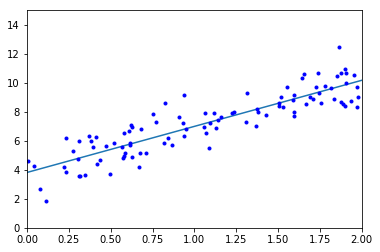

In [4]:
# Visualizing our ideal theta
plt.plot(X_new, y_predict) # plot of y predicted from x = [0,2]
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])

In [5]:
#####################################################################
#####################################################################

## Linear Regression using Scikit-Learn

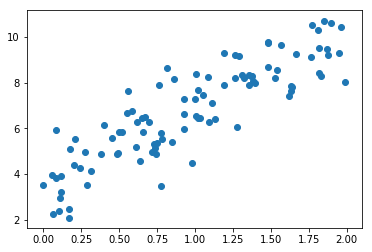

In [6]:
## Linear Regression using Scikit-Learn

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

plt.scatter(X,y)

In [7]:
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
lin_reg.intercept_, lin_reg.coef_

(array([3.59160095]), array([[3.26624814]]))

[[ 3.59160095]
 [10.12409724]]


[0, 2, 0, 15]

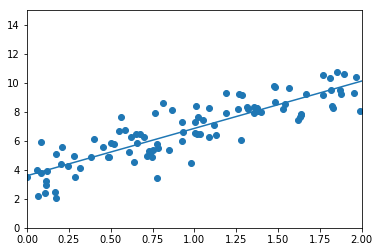

In [8]:
# Make a prediction
X_new = np.array([[0],[2]])
y_predict = lin_reg.predict(X_new)

print(y_predict)

# Plot the results
plt.scatter(X,y)
plt.plot(X_new, y_predict)
plt.axis([0,2,0,15])

In [9]:
#####################################################################
#####################################################################

## Batch Linear Regression

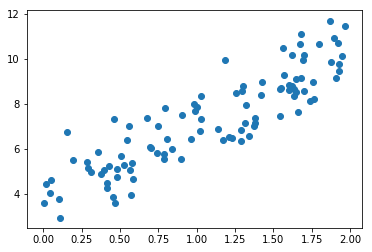

In [10]:
## Batch Linear Regression in Python

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 


X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Add first column of 1s for matrix operations
X_b = np.c_[np.ones((100,1)), X]

plt.scatter(X,y)

In [11]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

theta = np.random.randn(2,1)
print("Theta (i=0): " + str(theta))

for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    print("Theta (i=)" + str(i+1) + "): " + str(theta))
    
                
    

Theta (i=0): [[-1.51517233]
 [-1.83417056]]
Theta (i=)1): [[0.63300493]
 [0.80341145]]
Theta (i=)2): [[1.78530982]
 [2.19780307]]
Theta (i=)3): [[2.40780531]
 [2.93139312]]
Theta (i=)4): [[2.74831436]
 [3.31384288]]
Theta (i=)5): [[2.93861717]
 [3.50979918]]
Theta (i=)6): [[3.04879146]
 [3.60680196]]
Theta (i=)7): [[3.11610631]
 [3.65139205]]
Theta (i=)8): [[3.16038557]
 [3.66831041]]
Theta (i=)9): [[3.19217694]
 [3.67070675]]
Theta (i=)10): [[3.21709559]
 [3.66556761]]
Theta (i=)11): [[3.23813378]
 [3.65660264]]
Theta (i=)12): [[3.25688894]
 [3.64577921]]
Theta (i=)13): [[3.27421664]
 [3.63413847]]
Theta (i=)14): [[3.29057784]
 [3.62222919]]
Theta (i=)15): [[3.30622348]
 [3.61033847]]
Theta (i=)16): [[3.32129271]
 [3.59861443]]
Theta (i=)17): [[3.335865  ]
 [3.58713139]]
Theta (i=)18): [[3.34998802]
 [3.57592459]]
Theta (i=)19): [[3.36369232]
 [3.56500857]]
Theta (i=)20): [[3.37699921]
 [3.554387  ]]
Theta (i=)21): [[3.38992496]
 [3.54405791]]
Theta (i=)22): [[3.40248302]
 [3.53401639

[[ 3.83460541]
 [10.21107845]]


[0, 2, 0, 15]

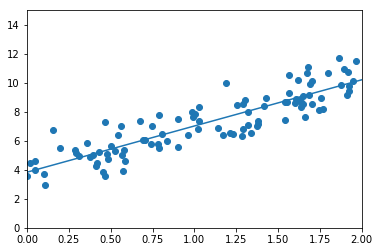

In [12]:
# Predictions based upon theta_best

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]

y_predict = X_new_b.dot(theta)
print(y_predict)

# Plot the results
plt.scatter(X,y)
plt.plot(X_new, y_predict)
plt.axis([0,2,0,15])

In [14]:
#####################################################################
#####################################################################

## Demo Boston Data Set

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [35]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline 

boston_housing_data = datasets.load_boston()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250FCD6DBA8>,
      dtype=object)

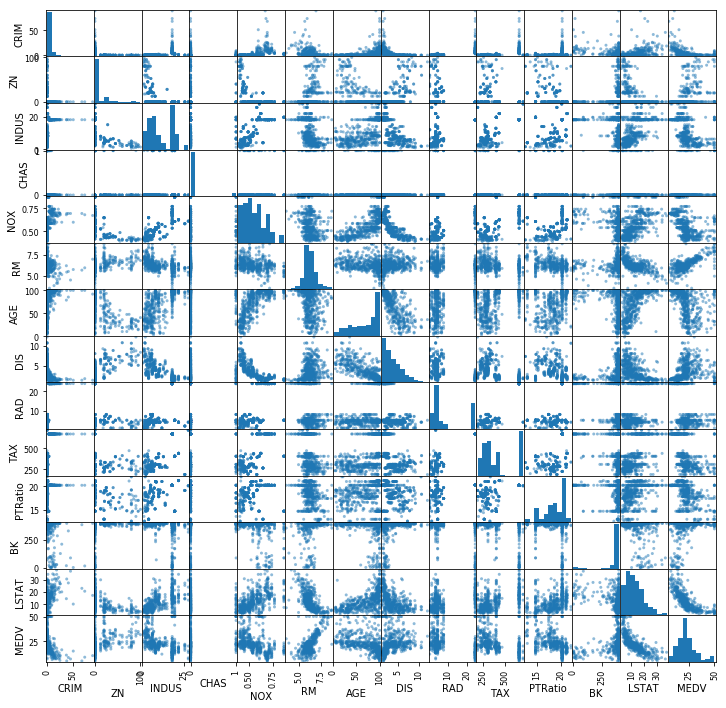

In [36]:
# Attempt to visualize data
df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

scatter_matrix(df, figsize=(12, 12))

In [56]:
train_X, test_X, train_y, test_y = train_test_split(boston_housing_data.data,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
lin_reg.intercept_, lin_reg.coef_

(33.71369756660087,
 array([-9.08899117e-02,  3.55162322e-02, -6.28312365e-03,  2.50386030e+00,
        -1.40421573e+01,  4.02245275e+00, -2.00586964e-02, -1.35537548e+00,
         2.68053676e-01, -1.18339333e-02, -9.67599481e-01,  8.84743451e-03,
        -4.25747647e-01]))

3.296829352605906

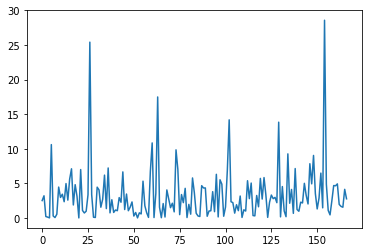

In [57]:
from sklearn.metrics import mean_absolute_error
plt.plot(abs(test_y - pred_y))

mean_absolute_error(test_y, pred_y)